In [1]:
from datetime import datetime, timedelta
from workalendar.europe import Netherlands
import gc
import random
import pandas as pd
import sys
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.signal import find_peaks

In [2]:
merged_data=pd.read_feather(r"C:\Users\20235624\Downloads\df_merged_unfiltered.feather")
merged_data

,RND_ID,2023-01-01 00:00,2023-01-01 00:15,2023-01-01 00:30,2023-01-01 00:45,2023-01-01 01:00,2023-01-01 01:15,2023-01-01 01:30,2023-01-01 01:45,2023-01-01 02:00,...,2023-12-31 22:00,2023-12-31 22:15,2023-12-31 22:30,2023-12-31 22:45,2023-12-31 23:00,2023-12-31 23:15,2023-12-31 23:30,2023-12-31 23:45,Baseload_profile,Connection category
0,8423,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,010,AC4A
1,6756,36.0,32.0,32.0,36.0,32.0,36.0,32.0,36.0,32.0,...,34.09,33.31,30.57,29.65,32.06,29.13,28.25,27.85,E3B,AC4B
2,1077,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,...,1.50,2.00,1.50,1.50,2.00,1.50,2.00,1.50,008,AC4A
3,8061,16.0,8.0,12.0,8.0,12.0,16.0,12.0,12.0,12.0,...,8.80,11.00,10.19,9.19,8.80,9.00,11.00,12.40,001,AC4B
4,10575,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,...,3.54,1.15,1.10,1.10,1.10,1.10,1.10,1.12,008,AC4B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24753,3076,16.0,16.0,16.0,16.0,12.0,16.0,12.0,16.0,12.0,...,0.44,0.46,0.44,0.44,0.46,0.44,0.46,0.46,E3A,AC4B
24754,3076,16.0,16.0,16.0,16.0,12.0,16.0,12.0,16.0,12.0,...,0.44,0.46,0.44,0.44,0.46,0.44,0.46,0.46,PV,AC4B
24755,3076,16.0,16.0,16.0,16.0,12.0,16.0,12.0,16.0,12.0,...,0.44,0.46,0.44,0.44,0.46,0.44,0.46,0.46,PV,AC4B
24756,5060,4.0,4.0,8.0,4.0,4.0,4.0,4.0,8.0,4.0,...,5.98,5.91,5.71,6.41,5.70,7.20,5.62,5.94,E3A,AC4A


In [3]:
merged_data = merged_data.head(100) # Filter for a smaller df
#merged_data = merged_data.drop('Unnamed: 0', axis=1)
merged_data


,RND_ID,2023-01-01 00:00,2023-01-01 00:15,2023-01-01 00:30,2023-01-01 00:45,2023-01-01 01:00,2023-01-01 01:15,2023-01-01 01:30,2023-01-01 01:45,2023-01-01 02:00,...,2023-12-31 22:00,2023-12-31 22:15,2023-12-31 22:30,2023-12-31 22:45,2023-12-31 23:00,2023-12-31 23:15,2023-12-31 23:30,2023-12-31 23:45,Baseload_profile,Connection category
0,8423,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,010,AC4A
1,6756,36.0,32.0,32.0,36.0,32.0,36.0,32.0,36.0,32.0,...,34.09,33.31,30.57,29.65,32.06,29.13,28.25,27.85,E3B,AC4B
2,1077,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,...,1.50,2.00,1.50,1.50,2.00,1.50,2.00,1.50,008,AC4A
3,8061,16.0,8.0,12.0,8.0,12.0,16.0,12.0,12.0,12.0,...,8.80,11.00,10.19,9.19,8.80,9.00,11.00,12.40,001,AC4B
4,10575,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,...,3.54,1.15,1.10,1.10,1.10,1.10,1.10,1.12,008,AC4B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11466,16.0,16.0,16.0,12.0,16.0,16.0,16.0,12.0,16.0,...,7.79,8.09,8.09,8.09,6.90,6.59,6.90,6.90,018,AC4A
96,810,12.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,2.39,2.39,2.39,2.39,2.10,2.39,2.39,2.39,E3C,AC4B
97,12125,16.0,16.0,16.0,16.0,20.0,16.0,20.0,20.0,16.0,...,14.00,13.35,14.24,19.64,13.32,13.03,14.19,14.96,008,AC4B
98,2901,12.0,8.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,...,2.70,2.70,2.44,2.35,2.39,2.24,2.75,2.89,E3C,AC4A


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from workalendar.europe import Netherlands

def is_workday(date):
    """
    Check if the date is a workday (Monday to Friday).
    """
    return date.weekday() < 5

def is_working_hours(time):
    """
    Check if the time is within working hours (9:00 to 17:00).
    """
    return 9 <= time.hour < 17

def is_not_holiday(date, holidays):
    """
    Check if the given date is not a holiday.
    """
    return date not in holidays

def get_dutch_holidays(year):
    """
    Get Dutch holidays for a specified year.
    """
    cal = Netherlands()
    return {date: name for date, name in cal.holidays(year)}

def generate_time_slots(start_date, end_date, interval='15min'):
    """
    Generate time slots between two dates at a specified interval.
    """
    return pd.date_range(start=start_date, end=end_date, freq=interval)

# Initialize Dutch calendar
def get_low_high_tariff():
    cal = Netherlands()
    # Get holidays for a specific year
    year = 2023
    nl_holidays_2023 = cal.holidays(year)

    # Define start and end date
    start_date = datetime(2023, 1, 1, 0, 0)
    end_date = datetime(2023, 12, 31, 23, 45)

    # Initialize list to store timestamps
    timestamps = []

    # Generate timestamps with 15-minute intervals
    current_date = start_date
    while current_date <= end_date:
        timestamps.append(current_date)
        current_date += timedelta(minutes=15)

    # Generate the binary sequence
    high_tariff = []
    for timestamp in timestamps:
        if is_workday(timestamp) and is_working_hours(timestamp.time()) and is_not_holiday(timestamp, nl_holidays_2023):
            high_tariff.append(1)
        else:
            high_tariff.append(0)
    return high_tariff, timestamps

# Get the high/low tariff and timestamps
high_tariff, timestamps = get_low_high_tariff()

# Convert timestamps to match the format in the dataset
timestamp_str = [ts.strftime('%Y-%m-%d %H:%M') for ts in timestamps]

# Create a DataFrame with the new features
tariff_df = pd.DataFrame({
    'Timestamp': timestamp_str,
    'High_Tariff': high_tariff
})
tariff_df['Timestamp'] = pd.to_datetime(tariff_df['Timestamp'])

In [5]:
# Extract date-time columns and RND_ID, Baseload_profile, Connection category columns
date_time_cols = [col for col in merged_data.columns if '2023' in col]
id_cols = [col for col in merged_data.columns if col not in date_time_cols]

# Convert date-time columns to long format
merged_data = merged_data.melt(id_vars=id_cols, value_vars=date_time_cols, var_name='Timestamp', value_name='Consumption')

# Convert 'Timestamp' to string to ensure format consistency
merged_data['Timestamp'] = merged_data['Timestamp'].astype(str)

In [6]:
# Convert 'Timestamp' to datetime
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

# Merge tariff information with the main data
merged_data = pd.merge(merged_data, tariff_df, on='Timestamp', how='left')

In [7]:
# Check if there are any negative values in the 'Consumption' column
has_negatives = (merged_data['Consumption'] < 0).any()

if has_negatives:
    merged_data['Consumption']=abs(merged_data['Consumption'])
    has_negatives = (merged_data['Consumption'] < 0).any()
    print("There are negative values in the 'Consumption' column.")
else:
    
    print("There are no negative values in the 'Consumption' column.")

There are negative values in the 'Consumption' column.


In [8]:
# Add time-based features
merged_data['hour'] = merged_data['Timestamp'].dt.hour
merged_data['day_of_week'] = merged_data['Timestamp'].dt.dayofweek
merged_data['month'] = merged_data['Timestamp'].dt.month
merged_data['date'] = merged_data['Timestamp'].dt.date
merged_data['is_weekend'] = merged_data['day_of_week'] >= 5

# Compute monthly total and average consumption
monthly_total = merged_data.groupby(['RND_ID', 'month'])['Consumption'].sum().reset_index()
monthly_avg = merged_data.groupby(['RND_ID', 'month'])['Consumption'].mean().reset_index()

# Merge monthly total and average back to the main data
merged_data = pd.merge(merged_data, monthly_total, on=['RND_ID', 'month'], suffixes=('', '_monthly_total'))
merged_data = pd.merge(merged_data, monthly_avg, on=['RND_ID', 'month'], suffixes=('', '_monthly_avg'))

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504000 entries, 0 to 3503999
Data columns (total 13 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   RND_ID                     object        
 1   Baseload_profile           object        
 2   Connection category        object        
 3   Timestamp                  datetime64[ns]
 4   Consumption                float64       
 5   High_Tariff                int64         
 6   hour                       int32         
 7   day_of_week                int32         
 8   month                      int32         
 9   date                       object        
 10  is_weekend                 bool          
 11  Consumption_monthly_total  float64       
 12  Consumption_monthly_avg    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 284.0+ MB


In [10]:
# Compute monthly total and average consumption
daily_total = merged_data.groupby(['RND_ID', 'date'])['Consumption'].sum().reset_index()
#monthly_avg = merged_data.groupby(['RND_ID', 'month'])['Consumption'].mean().reset_index()

# Merge monthly total and average back to the main data
merged_data = pd.merge(merged_data, daily_total , on=['RND_ID', 'date'], suffixes=('', '_daily_total'))
merged_data['Consumption_daily_total']= merged_data['Consumption_daily_total']

In [11]:
features=merged_data
features.drop_duplicates


<bound method DataFrame.drop_duplicates of         RND_ID Baseload_profile Connection category           Timestamp  \
0         8423              010                AC4A 2023-01-01 00:00:00   
1         8423              010                AC4A 2023-01-01 00:15:00   
2         8423              010                AC4A 2023-01-01 00:30:00   
3         8423              010                AC4A 2023-01-01 00:45:00   
4         8423              010                AC4A 2023-01-01 01:00:00   
...        ...              ...                 ...                 ...   
3503995   4109              E3A                AC4B 2023-12-31 22:45:00   
3503996   4109              E3A                AC4B 2023-12-31 23:00:00   
3503997   4109              E3A                AC4B 2023-12-31 23:15:00   
3503998   4109              E3A                AC4B 2023-12-31 23:30:00   
3503999   4109              E3A                AC4B 2023-12-31 23:45:00   

         Consumption  High_Tariff  hour  day_of_week  mo

In [12]:
# Implement adaptive k-means
def adaptive_kmeans(load_shapes, theta, max_clusters=50):
    k = min(3, load_shapes.shape[0])
    clusters = KMeans(n_clusters=k, n_init=10).fit(load_shapes)
    
    while k < max_clusters:
        max_distance = max([np.linalg.norm(load_shapes[clusters.labels_ == i] - clusters.cluster_centers_[i], axis=1).max() for i in range(k)])
        if max_distance < theta or k >= load_shapes.shape[0]:
            break
        k += 1
        clusters = KMeans(n_clusters=k, n_init=10).fit(load_shapes)
    
    return clusters
pivot_table = features.pivot_table(index=['RND_ID', 'month'], values='Consumption_monthly_total').fillna(0)
load_shapes = pivot_table.values
theta = 0.1  # Example threshold value
initial_clusters = adaptive_kmeans(load_shapes, theta)

C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

Consumption_monthly_total
RND_ID month                           
10038  1                       32224.00
       2                       28276.00
       3                       32117.79
       4                       24285.21
       5                       24704.11
...                                 ...
9815   8                       98313.91
       9                       98746.09
       10                      89561.19
       11                      83773.75
       12                      87969.06

[696 rows x 1 columns]

In [13]:
# Hierarchical Agglomerative Clustering (HAC)
def hierarchical_clustering(cluster_centers, desired_clusters):
    Z = linkage(cluster_centers, 'ward')
    cluster_labels = fcluster(Z, desired_clusters, criterion='maxclust')
    return cluster_labels

# Example usage
cluster_centers = initial_clusters.cluster_centers_
desired_clusters = min(5, cluster_centers.shape[0])  # Ensure desired_clusters <= number of cluster centers
final_cluster_labels = hierarchical_clustering(cluster_centers, desired_clusters)


In [14]:
final_cluster_labels

array([1, 3, 2, 5, 2, 1, 1, 1, 4, 3, 2, 1, 2, 2, 5, 2, 1, 3, 3, 1, 2, 5,
       1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 4, 1, 3, 3, 1, 4, 1, 1, 1, 2, 3,
       5, 1, 2, 1, 2, 3], dtype=int32)

In [15]:
from sklearn.metrics.pairwise import euclidean_distances
# Assign new load shapes to the closest TLP
def encode_load_shapes(load_shapes, cluster_centers):
    distances = euclidean_distances(load_shapes, cluster_centers)
    closest_clusters = np.argmin(distances, axis=1)
    return closest_clusters

# Example usage
encoded_shapes = encode_load_shapes(load_shapes, cluster_centers)
encoded_shapes

array([37, 37, 37, 19, 19, 37, 19, 37, 37, 16, 37, 37, 26,  4, 26, 31, 39,
        7,  7,  6, 18,  9,  1, 13,  5,  5,  5, 16, 16,  0,  0,  0,  0, 16,
       37, 37, 18, 49, 49, 31, 27, 12, 27, 26, 17, 36, 36, 18,  7, 45, 45,
       22, 22, 22, 22, 22, 22, 45, 45,  7, 39, 39,  7, 22, 22, 22, 22, 22,
       22, 22, 22, 22,  7, 39, 16,  6, 24, 10, 11, 47, 40, 39,  7,  7, 19,
       39, 39, 39, 39, 19, 19, 19, 19, 39, 39, 39, 23, 34, 23, 23, 23,  6,
        6, 47,  6,  6,  6, 40, 20, 46, 25, 25, 29, 12, 12, 42, 29,  2, 46,
       46, 11, 28, 11, 47, 28, 11, 23, 16, 24, 10, 10, 28, 15, 12, 48,  1,
       17, 31, 31, 26, 31, 13, 42, 25, 47,  6, 47,  6, 11, 28, 28, 28, 23,
       23, 47, 47, 29, 20, 20, 25, 25, 25, 20, 20,  2, 29, 29, 42, 24, 46,
        2, 10, 32, 24, 47,  6, 47,  6,  6,  6, 45, 22, 45, 22, 22, 22, 22,
       22, 22, 22, 22, 45,  0,  0,  0, 37,  0, 40, 40, 40,  0, 16, 37, 19,
       28, 47, 47, 34, 23,  6, 23, 34, 40, 47, 28, 47,  4, 27, 48, 42, 12,
       27, 27,  4, 27, 31

In [16]:
#features['encoded_shapes']=encoded_shapes
# Add the final cluster labels to the pivot table DataFrame
pivot_table['encoded_shapes'] = encoded_shapes

In [17]:

# Merge the cluster labels with the original dataset
features = pd.merge(features,pivot_table.reset_index()[['encoded_shapes','RND_ID','month']], on=['RND_ID','month'], how='right')


In [28]:
# Clustering customers based on TLP frequency distribution
customer_tlp_distribution = features.groupby('RND_ID')['encoded_shapes'].apply(lambda x: np.bincount(x, minlength=len(cluster_centers)) / len(x))

# Perform k-means clustering on the TLP frequency distributions
kmeans_customers = KMeans(n_clusters=7, n_init=10).fit(np.vstack(customer_tlp_distribution))
customer_labels = kmeans_customers.labels_

# Create a DataFrame for customer labels
customer_labels_df = pd.DataFrame({'RND_ID': customer_tlp_distribution.index, 'cluster_label': customer_labels})

# Merge the customer labels with the original dataset
data_with_labels = features.merge(customer_labels_df, on='RND_ID')


C:\Users\20235624\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


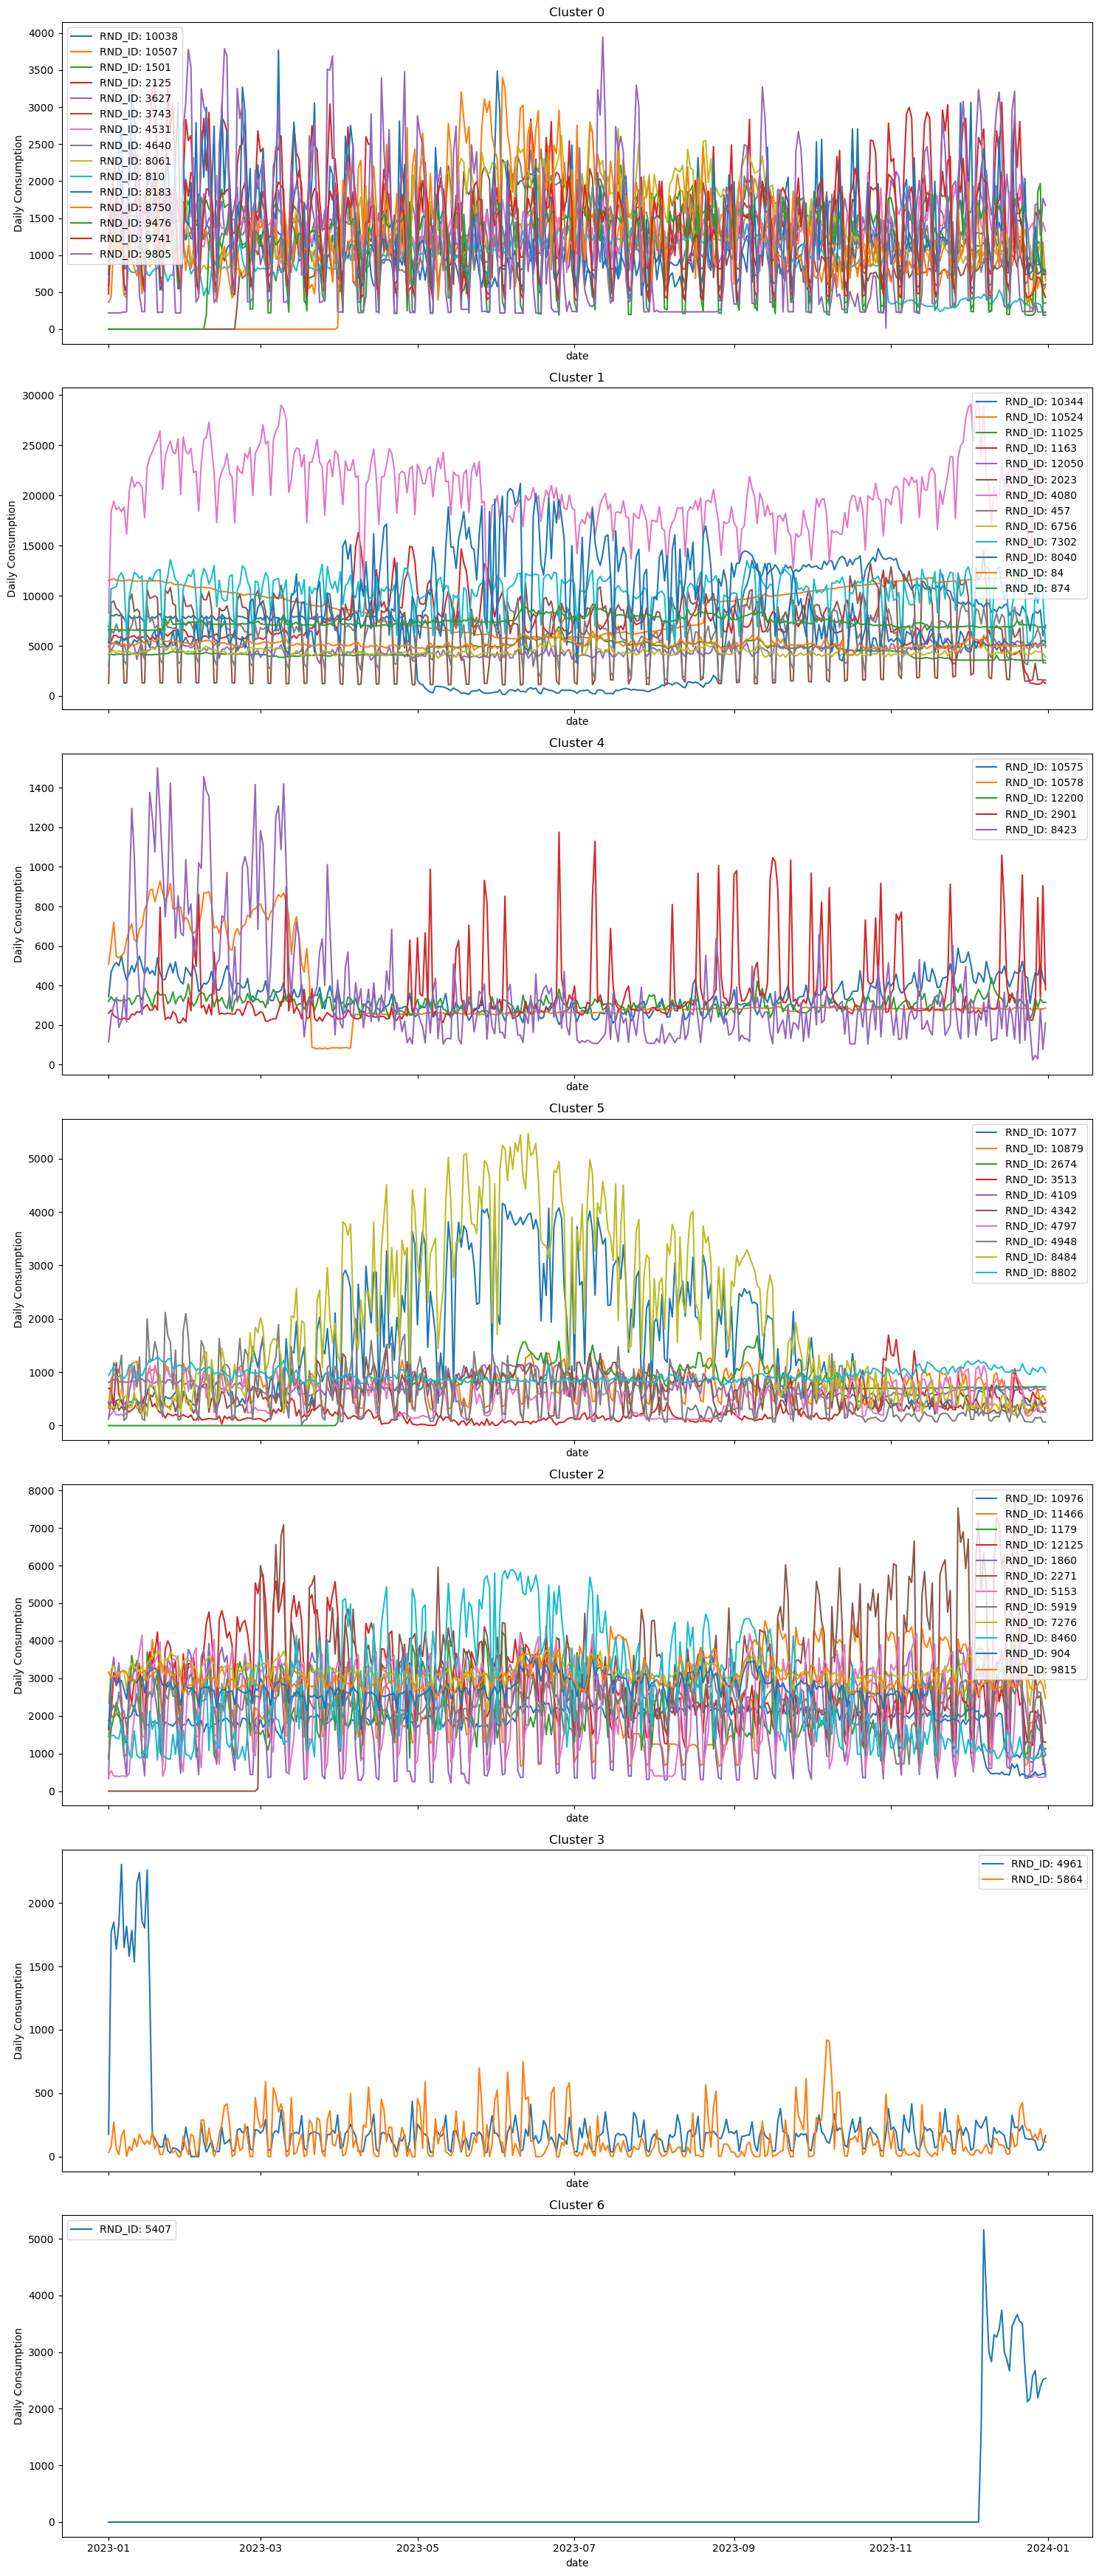

In [29]:
import matplotlib.pyplot as plt
# Plotting consumption for each RND_ID based on each month by sub-plotting each cluster
unique_clusters = data_with_labels['cluster_label'].unique()
num_clusters = len(unique_clusters)

# Create subplots
fig, axes = plt.subplots(num_clusters, 1, figsize=(15, num_clusters * 5), sharex=True)
if num_clusters == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one cluster

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]
    cluster_data = data_with_labels[data_with_labels['cluster_label'] == cluster]
    
    for rnd_id in cluster_data['RND_ID'].unique():
        customer_data = cluster_data[cluster_data['RND_ID'] == rnd_id]
        monthly_consumption = customer_data.groupby('date')['Consumption'].sum()
        ax.plot(monthly_consumption.index, monthly_consumption.values, label=f'RND_ID: {rnd_id}')
    
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('date')
    ax.set_ylabel('Daily Consumption')
    ax.legend()

plt.tight_layout()
plt.show()

In [27]:
merged_data=data_with_labels
merged_data

,RND_ID,Baseload_profile,Connection category,Timestamp,Consumption,High_Tariff,hour,day_of_week,month,date,is_weekend,Consumption_monthly_total,Consumption_monthly_avg,Consumption_daily_total,encoded_shapes,cluster_label
0,10038,013,AC4B,2023-01-01 00:00:00,8.00,0,0,6,1,2023-01-01,True,32224.00,10.827957,584.00,37,1
1,10038,013,AC4B,2023-01-01 00:15:00,8.00,0,0,6,1,2023-01-01,True,32224.00,10.827957,584.00,37,1
2,10038,013,AC4B,2023-01-01 00:30:00,8.00,0,0,6,1,2023-01-01,True,32224.00,10.827957,584.00,37,1
3,10038,013,AC4B,2023-01-01 00:45:00,8.00,0,0,6,1,2023-01-01,True,32224.00,10.827957,584.00,37,1
4,10038,013,AC4B,2023-01-01 01:00:00,8.00,0,1,6,1,2023-01-01,True,32224.00,10.827957,584.00,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503995,9815,E3B,AC4B,2023-12-31 22:45:00,16.19,0,22,6,12,2023-12-31,True,87969.06,29.559496,2465.35,24,0
3503996,9815,E3B,AC4B,2023-12-31 23:00:00,15.37,0,23,6,12,2023-12-31,True,87969.06,29.559496,2465.35,24,0
3503997,9815,E3B,AC4B,2023-12-31 23:15:00,14.84,0,23,6,12,2023-12-31,True,87969.06,29.559496,2465.35,24,0
3503998,9815,E3B,AC4B,2023-12-31 23:30:00,16.25,0,23,6,12,2023-12-31,True,87969.06,29.559496,2465.35,24,0


In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504000 entries, 0 to 3503999
Data columns (total 16 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   RND_ID                     object        
 1   Baseload_profile           object        
 2   Connection category        object        
 3   Timestamp                  datetime64[ns]
 4   Consumption                float64       
 5   High_Tariff                int64         
 6   hour                       int32         
 7   day_of_week                int32         
 8   month                      int32         
 9   date                       object        
 10  is_weekend                 bool          
 11  Consumption_monthly_total  float64       
 12  Consumption_monthly_avg    float64       
 13  Consumption_daily_total    float64       
 14  encoded_shapes             int64         
 15  cluster_label              int32         
dtypes: bool(1), datetime64[ns](1), float

# Creat lagged features for 15min, 30min, 45 minutes and 1 hour and historical statistics features (mean, median, std)

In [18]:
merged_df = pd.DataFrame(merged_data)
merged_df.set_index('Timestamp', inplace=True)

# Define the number of periods for each lag
lag_periods = {
    '15_minutes': 1,
    '30_minutes': 2,
    '45_minutes': 3,
    '1_hour': 4
}

# Create lagged features for 'Consumption'
for label, periods in lag_periods.items():
    merged_df[f'Consumption_lag_{label}'] = merged_df.groupby('RND_ID')['Consumption'].shift(periods)

# Create rolling statistics features
def create_rolling_features(df, column, windows, groupby_col='RND_ID'):
    for window in windows:
        window_size = window['size']
        window_label = window['label']
        rolling_obj = df.groupby(groupby_col)[column].rolling(window=window_size, min_periods=1)
        df[f'{column}_mean_{window_label}'] = rolling_obj.mean().reset_index(level=0, drop=True)
        df[f'{column}_median_{window_label}'] = rolling_obj.median().reset_index(level=0, drop=True)
        df[f'{column}_std_{window_label}'] = rolling_obj.std().reset_index(level=0, drop=True)

# Define the windows for rolling statistics
windows = [
    {'size': 1, 'label': '15_minutes'},
    {'size': 2, 'label': '30_minutes'},
    {'size': 3, 'label': '45_minutes'},
    {'size': 4, 'label': '1_hour'}
]

# Apply the function to create rolling features
create_rolling_features(merged_df, 'Consumption', windows)

# Display the resulting DataFrame
print(merged_df.head(10))

           RND_ID Baseload_profile Connection category  Consumption  \
Timestamp                                                             
2023-01-01   8423              010                AC4A          0.0   
2023-01-01   6756              E3B                AC4B         36.0   
2023-01-01   1077              008                AC4A          0.0   
2023-01-01   8061              001                AC4B         16.0   
2023-01-01  10575              008                AC4B          0.0   
2023-01-01   4797              008                AC4A          0.0   
2023-01-01   8484              013                AC4A          0.0   
2023-01-01   4080               PV                AC4B         16.0   
2023-01-01   4080               PV                AC4B         16.0   
2023-01-01   4080              013                AC4B         16.0   

            High_Tariff  hour  day_of_week  month  is_weekend  \
Timestamp                                                       
2023-01-01       

In [19]:
#merged_df = pd.DataFrame(merged_data)
merged_data.set_index('Timestamp', inplace=True)

# Create lagged features
lags = [15, 30, 45, 60]  # in minutes
for lag in lags:
    merged_data[f'Consumption_lag_{lag}min'] = merged_data['Consumption'].shift(lag // 15)

# Create historical statistics features
window = 4  # You can adjust the window size as needed (e.g., 4 for the past hour if data is in 15-min intervals)
merged_data['Consumption_rolling_mean'] = merged_data['Consumption'].rolling(window=window).mean()
merged_data['Consumption_rolling_median'] = merged_data['Consumption'].rolling(window=window).median()
merged_data['Consumption_rolling_std'] = merged_data['Consumption'].rolling(window=window).std()

# Display the DataFrame with new features
print(merged_data.head(10))

           RND_ID Baseload_profile Connection category  Consumption  \
Timestamp                                                             
2023-01-01   8423              010                AC4A          0.0   
2023-01-01   6756              E3B                AC4B         36.0   
2023-01-01   1077              008                AC4A          0.0   
2023-01-01   8061              001                AC4B         16.0   
2023-01-01  10575              008                AC4B          0.0   
2023-01-01   4797              008                AC4A          0.0   
2023-01-01   8484              013                AC4A          0.0   
2023-01-01   4080               PV                AC4B         16.0   
2023-01-01   4080               PV                AC4B         16.0   
2023-01-01   4080              013                AC4B         16.0   

            High_Tariff  hour  day_of_week  month  is_weekend  \
Timestamp                                                       
2023-01-01       

In [16]:
merged_data.to_csv

,RND_ID,BASELOAD_PROFILE,CONNECTION_CATEGORY,Consumption,High_Tariff,hour,day_of_week,month,is_weekend,Consumption_monthly_total,Consumption_monthly_avg,Consumption_lag_15min,Consumption_lag_30min,Consumption_lag_45min,Consumption_lag_60min,Consumption_rolling_mean,Consumption_rolling_median,Consumption_rolling_std
Timestamp,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,8423,010,AC4A,0.00,0,0,6,1,True,23104.00,7.763441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:15:00,8423,010,AC4A,0.00,0,0,6,1,True,23104.00,7.763441,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:30:00,8423,010,AC4A,0.00,0,0,6,1,True,23104.00,7.763441,0.00,0.00,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:45:00,8423,010,AC4A,0.00,0,0,6,1,True,23104.00,7.763441,0.00,0.00,0.00,NaN,0.0000,0.00,0.000000
2023-01-01 01:00:00,8423,010,AC4A,4.00,0,1,6,1,True,23104.00,7.763441,0.00,0.00,0.00,0.00,1.0000,0.00,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:45:00,4109,E3A,AC4B,7.51,0,22,6,12,True,21328.84,7.166949,7.32,7.44,7.12,7.48,7.3475,7.38,0.170758
2023-12-31 23:00:00,4109,E3A,AC4B,7.20,0,23,6,12,True,21328.84,7.166949,7.51,7.32,7.44,7.12,7.3675,7.38,0.136473
2023-12-31 23:15:00,4109,E3A,AC4B,7.28,0,23,6,12,True,21328.84,7.166949,7.20,7.51,7.32,7.44,7.3275,7.30,0.131498


In [17]:
merged_data.to_csv("100_customers_featured_telemetry.csv")

 # Fourier Transform fature Montly Aggregated 

### The Fourier Transform is a mathematical technique that transforms time-domain data into the frequency domain, providing insights into the periodicity and frequency components of the data. By applying the Fourier Transform to monthly consumption data, we can capture and utilize underlying periodic patterns in the data,

- Seasonality and Trends: The Fourier Transform can help capture seasonality and trends in the data, which are important for forecasting.
- Aggregation Method: The choice of aggregation (sum, mean, etc.) can affect the FFT results. Choose based on the specific characteristics of your data.
- Merge Strategy: Ensure the merge strategy aligns with your data's structure and the analysis requirements.
This approach will help you incorporate Fourier Transform features into your dataset, potentially improving the predictive power of your model by capturing periodic patterns in the consumption data.

In [ ]:
merged_data=

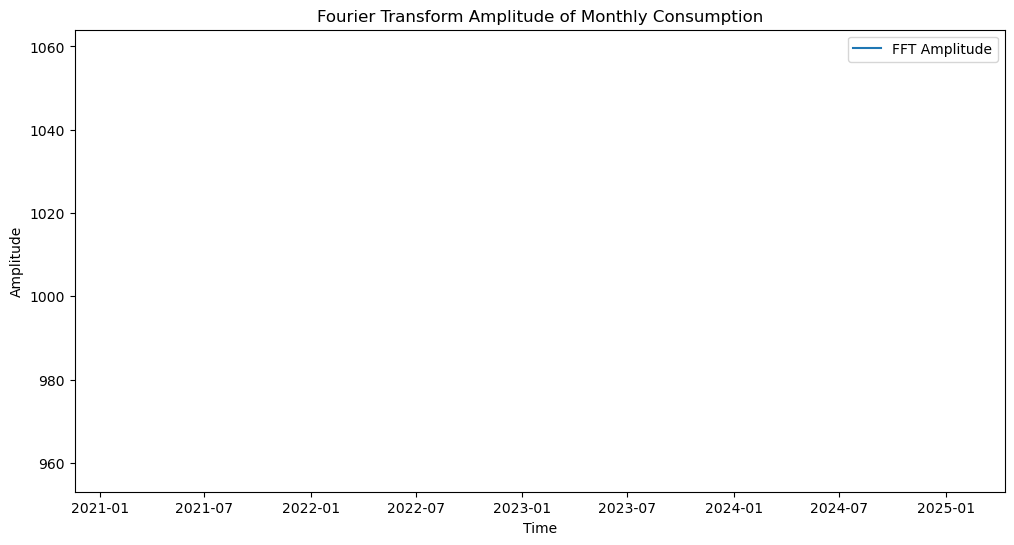

  RND_ID Baseload_profile Connection category  Consumption  High_Tariff  hour  \
0   8423              010                AC4A          0.0            0     0   
1   6756              E3B                AC4B         36.0            0     0   
2   1077              008                AC4A          0.0            0     0   
3   8061              001                AC4B         16.0            0     0   
4  10575              008                AC4B          0.0            0     0   
5   4797              008                AC4A          0.0            0     0   
6   8484              013                AC4A          0.0            0     0   
7   4080               PV                AC4B         16.0            0     0   
8   4080               PV                AC4B         16.0            0     0   
9   4080              013                AC4B         16.0            0     0   

   day_of_week  is_weekend  Consumption_monthly_total  \
0            6        True                        0

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aggregate data by month
monthly_consumption = merged_data['Consumption'].resample('M').sum()

# Apply Fourier Transform
fft_result = np.fft.fft(monthly_consumption)
fft_frequencies = np.fft.fftfreq(len(monthly_consumption))

# Extract amplitude and phase
amplitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame for Fourier features
fft_features = pd.DataFrame({
    'FFT_Amplitude': amplitude,
    'FFT_Phase': phase
}, index=monthly_consumption.index)

# Plot to see the results (optional)
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, amplitude, label='FFT Amplitude')
plt.title('Fourier Transform Amplitude of Monthly Consumption')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Add a month column for merging
fft_features['month'] = fft_features.index.month
merged_data['month'] = merged_data.index.month

# Merge the features into the original DataFrame
merged_data = pd.merge(merged_data, fft_features, on='month', how='left')

# Drop unnecessary columns if needed
merged_data.drop(['month'], axis=1, inplace=True)

# Display the DataFrame with new Fourier Transform features
print(merged_data.head(10))

In [21]:
merged_data

,RND_ID,Baseload_profile,Connection category,Consumption,High_Tariff,hour,day_of_week,is_weekend,Consumption_monthly_total,Consumption_monthly_avg,Consumption_lag_15min,Consumption_lag_30min,Consumption_lag_45min,Consumption_lag_60min,Consumption_rolling_mean,Consumption_rolling_median,Consumption_rolling_std,FFT_Amplitude,FFT_Phase
0,8423,010,AC4A,0.0,0,0,6,True,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008.55,0.0
1,6756,E3B,AC4B,36.0,0,0,6,True,36.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1008.55,0.0
2,1077,008,AC4A,0.0,0,0,6,True,0.0,0.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,1008.55,0.0
3,8061,001,AC4B,16.0,0,0,6,True,16.0,16.0,0.0,36.0,0.0,NaN,13.0,8.0,17.088007,1008.55,0.0
4,10575,008,AC4B,0.0,0,0,6,True,0.0,0.0,16.0,0.0,36.0,0.0,13.0,8.0,17.088007,1008.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11466,018,AC4A,16.0,0,0,6,True,16.0,16.0,4.0,4.0,4.0,4.0,7.0,4.0,6.000000,1008.55,0.0
96,810,E3C,AC4B,12.0,0,0,6,True,12.0,12.0,16.0,4.0,4.0,4.0,9.0,8.0,6.000000,1008.55,0.0
97,12125,008,AC4B,16.0,0,0,6,True,16.0,16.0,12.0,16.0,4.0,4.0,12.0,14.0,5.656854,1008.55,0.0
98,2901,E3C,AC4A,12.0,0,0,6,True,12.0,12.0,16.0,12.0,16.0,4.0,14.0,14.0,2.309401,1008.55,0.0


merged_data.info()

# Customer Segmentation based on Overall Load Pattern

In [29]:
merged_data = pd.DataFrame(merged_data)


In [30]:
# Check if there are any negative values in the 'Consumption' column
has_negatives = (merged_data['Consumption'] < 0).any()

if has_negatives:
    merged_data['Consumption']=abs(merged_data['Consumption'])
    has_negatives = (merged_data['Consumption'] < 0).any()
    print("There are negative values in the 'Consumption' column.")
else:
    
    print("There are no negative values in the 'Consumption' column.")

There are no negative values in the 'Consumption' column.


ValueError: value_name (Consumption) cannot match an element in the DataFrame columns.